# Comparing different datasets, sample level

- This notebook is focusing on comparing surface marker expression between NK cells and B cells, and NK cells and isotype controls (available for Neurips dataset).



Used NK cell markers are selected based on recent papers and documentation of Mustjoki group; 

- Pfefferle, A., et al. (2019). A Temporal Transcriptional Map of Human Natural Killer Cell Differentiation. BioRxiv, 630657. https://doi.org/10.1101/630657
- Melsen, J. E., et al. (2022). Single-cell transcriptomics in bone marrow delineates CD56dimGranzymeK+ subset as intermediate stage in NK cell differentiation. Frontiers in immunology, 13, 1044398. https://doi.org/10.3389/fimmu.2022.1044398
- Yang, C., et al.(2019). Heterogeneity of human bone marrow and blood natural killer cells defined by single-cell transcriptome. Nature communications, 10(1), 3931. https://doi.org/10.1038/s41467-019-11947-7




Datasets:

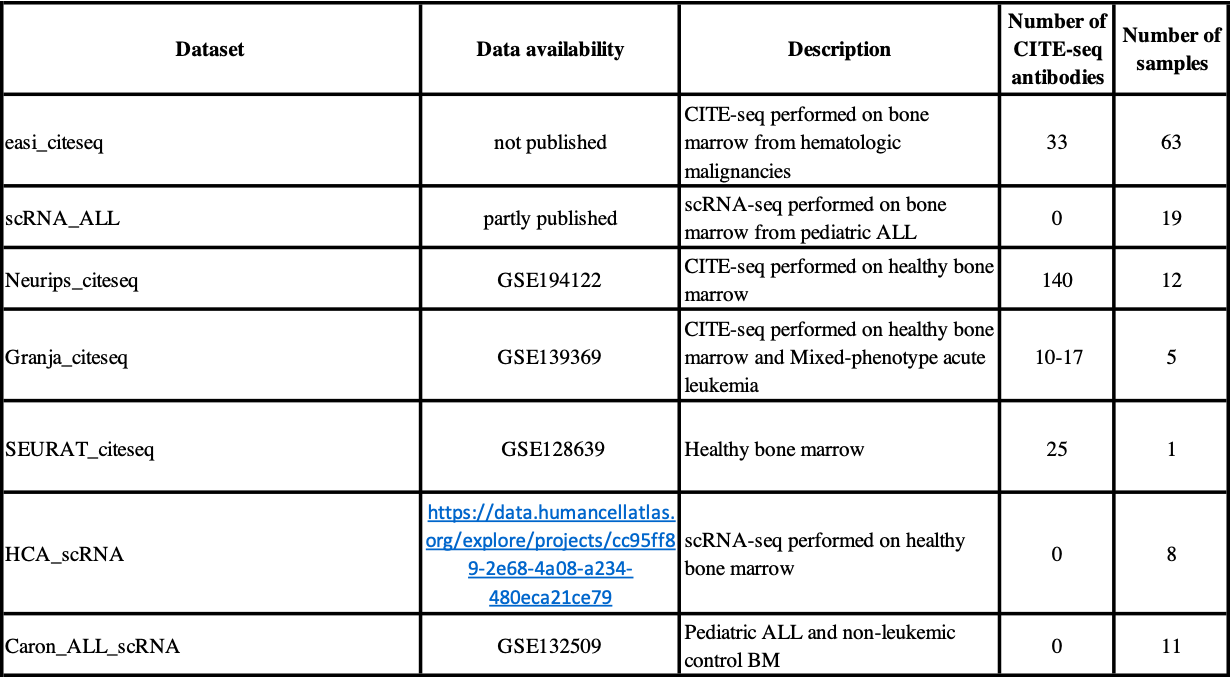

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


## File preparations

### Neurips

In [3]:
#Neurips

adata= sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/AA_norm.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 5469 × 11572
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_0.05'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'd

In [5]:
#selecting only NK cells (=cluster 0), identified in earlier notebook

adata_nk = adata[adata.obs['leiden_0.05'] == "0"]

In [51]:
adata_nk

View of AnnData object with n_obs × n_vars = 2697 × 11572
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_0.05'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells-2', 'highly_variable-2', 'means-2', 'dispersion

In [52]:
#selecting only NK cells (=cluster 0), identified in earlier notebook

adata_nk = adata_nk[adata_nk.obs['cell_type'] == "NKT"]

In [53]:
#NK cell cluster contained small amount of cell annotated as "leukemic", these cells are removed

adata_nk

View of AnnData object with n_obs × n_vars = 2655 × 11572
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_0.05'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells-2', 'highly_variable-2', 'means-2', 'dispersion

## Comparisons

In [54]:
#NK cell markers (Reference 1)

nk_immature = ['CD56']
nk_activating= ['CD335', 'CD314', 'CD2', 'CD226']
nk_maturation= ['CD57']
nk_inhibitory= ['CD158e1']

nk_mustjoki = [nk_immature, nk_activating, nk_maturation, nk_inhibitory]
nk_mustjoki = list(np.concatenate(nk_mustjoki).flat)


In [55]:
#NK cell markers (Reference 2) used in Neurips antibody panel

nk_immature_pfef = ['CD56']
nk56dim = ['CD94','CD158b', 'CD57']

# nk_adaptive =['CD158b', 'CD159c, CD57'] CD159c not used in Neurips, so this is same as previous

nk_transition= ['TIGIT', 'CD155', 'CD226', 'CD161'] 

c1_pfef = ['CD195', 'CD122', 'CD94']
c2_pfef = ['CD62L', 'CD127', 'CD27', 'TIGIT']
c3_pfef = ['CD16', 'CD38']

pseudotime= ['CD161', 'CD94', 'CD56', 'CD5', 'CD7', 'CD122']


#bigger list including all markers

nk_pfef=[nk56dim, nk_transition, c1_pfef, c2_pfef, c3_pfef, pseudotime]
nk_pfef = list(np.concatenate(nk_pfef).flat)

In [56]:
# Reference 3, Melsen et al. 

cd56bright_mels_prot= ['CD56', "CD2"]
cd56dim_mels_1_prot = ['CD16']
cd56dim_mels_2_prot  = ['CD62L'] 
red_eff_mels_prot = ['CD16']
clust3_mels_prot = ['CD34']

nk_melsen = [cd56bright_mels_prot, cd56dim_mels_1_prot,cd56dim_mels_2_prot,red_eff_mels_prot, clust3_mels_prot]
nk_melsen = list(np.concatenate(nk_melsen).flat)

In [57]:
# Reference 4, Yang et al. 

is_nk_yang_prot = ['CD94','CD56'] 
inflamed_nk_prot = ['CD69']
active_nk_prot = ["CD69"]
maturation_prot = ['CD62L', 'CD57'] 
adaptive_high_prot = ['CD52']
mature_prot = ['CD57']
terminal_prot = ['CX3CR1']

nk_yang = [is_nk_yang_prot,inflamed_nk_prot,active_nk_prot,maturation_prot,adaptive_high_prot,mature_prot,terminal_prot]

nk_yang = list(np.concatenate(nk_yang).flat)

In [58]:
#markers from all references

nk_all = [nk_mustjoki, nk_pfef, nk_melsen, nk_yang]
nk_all = list(np.concatenate(nk_all).flat)

In [59]:
#remove duplicates
nk_all = list(set(nk_all))

In [60]:
#Full list of NK cell surface markers collected from 4 references
nk_all

['CD34',
 'CD38',
 'CD5',
 'CD57',
 'CD94',
 'CD2',
 'CD27',
 'CD7',
 'CD314',
 'CD161',
 'TIGIT',
 'CX3CR1',
 'CD69',
 'CD226',
 'CD56',
 'CD158b',
 'CD195',
 'CD127',
 'CD335',
 'CD122',
 'CD52',
 'CD158e1',
 'CD62L',
 'CD155',
 'CD16']

In [61]:
#check which markers were used in Neurips

listOfmarkers= nk_all

nk_neu = []

for x in listOfmarkers:
    if x in adata_nk.obsm['protein_expression_dsb'].columns:
        nk_neu.append(x)



In [62]:
nk_neu

['CD34', 'CD38', 'CD5', 'CD2', 'CD7', 'CD56', 'CD127']

### Comparing to B cells

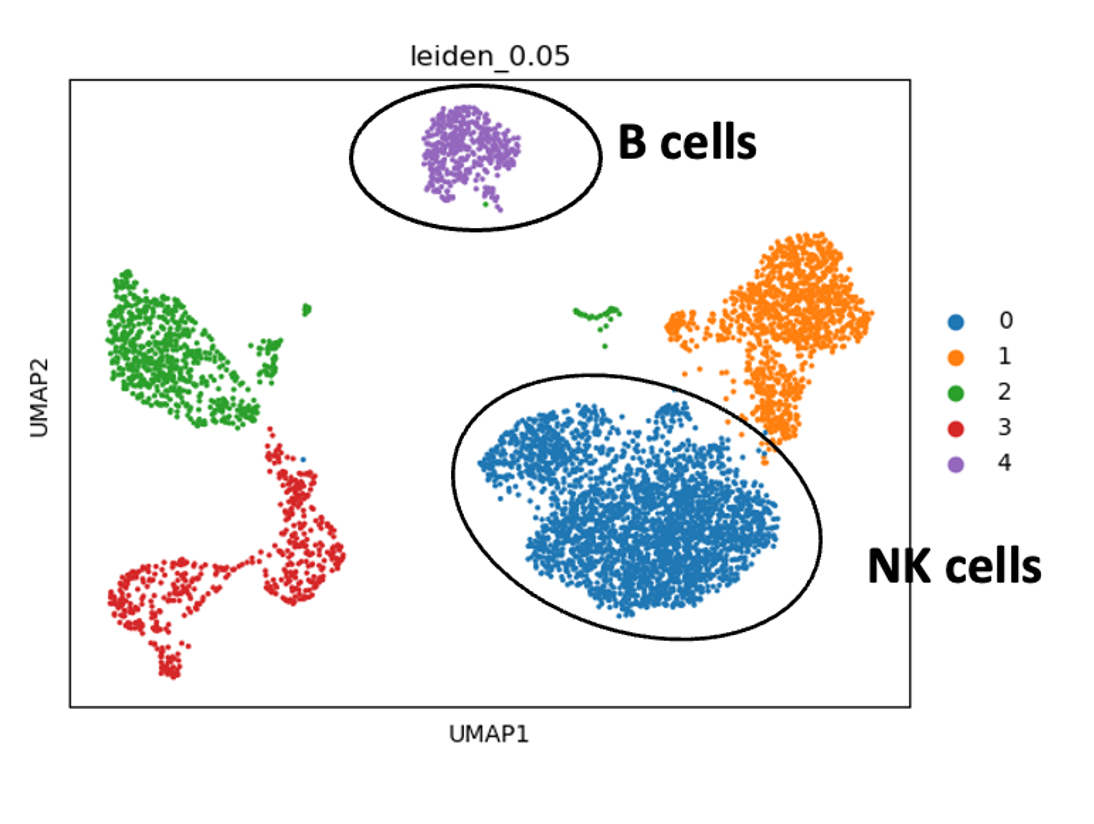

B cells were selected for comparisons, since these cells are not expected to express same surface markers as NK cells at high levels. Additionally, size of the B and NK cells is comparable. Based on leiden clustering (resolution 0.05) and marker/protein analysis ("easi_nk_AA_clustering" -notebook), cluster 4 represents B cells and cluster 0 NK cells

In [63]:
#Sample names
samples=adata_nk.obs['POOL'].unique().tolist()

samples

['EG34', 'EG36', 'EG35']

## DSB

In [64]:
#saving protein expression in NK cells into a list

list_prot_nk=[]

for sample in samples:
    eg=adata[(adata.obs['leiden_0.05'] ==  "0")]
    eg1=eg[eg.obs['POOL'] == sample]
    prot=eg1.obsm['protein_expression_dsb']
    prot_marker=prot[nk_neu]
    list_prot_nk.append(prot_marker)
    

In [65]:
#Adding cell type information after sample name

string= " NK cells"

samples_nk = [x + string for x in samples]

In [66]:
#Adding sample names

list_adata_nk=[]

for i in range(len(list_prot_nk)):
    sample= list_prot_nk[i]
    sample["Sample"]=samples_nk[i]
    list_adata_nk.append(sample)
    
#creating df

df_nk=pd.concat(list_adata_nk, axis=0)

In [67]:
#selecting B cells

adata_b=adata[adata.obs['leiden_0.05'] == '4']

In [68]:
#saving protein counts in B cells into a list

list_prot_b=[]

for sample in samples:
    eg=adata[adata.obs['leiden_0.05'] == '4']
    eg1=eg[eg.obs['POOL'] == sample]
    prot=eg1.obsm['protein_expression_dsb']
    prot_marker=prot[nk_neu]
    list_prot_b.append(prot_marker)

In [69]:
#Adding cell type information to sample names

string= " B cells"

samples_b = [x + string for x in samples]

In [70]:
#Adding sample names

list_adata_b=[]

for i in range(len(list_prot_b)):
    sample= list_prot_b[i]
    sample["Sample"]=samples_b[i]
    list_adata_b.append(sample)
    
#creating df
    
df_b=pd.concat(list_adata_b, axis=0)

In [71]:
#NK cells

df_nk.shape

(2697, 8)

In [72]:
#B cells

df_b.shape

(401, 8)

In [73]:
df=pd.concat([df_nk, df_b], axis=0)

df.shape

(3098, 8)

In [74]:
samples_b

['EG34 B cells', 'EG36 B cells', 'EG35 B cells']

In [75]:
#Assigning sample pairs (one sample, B + NK cells)

data1 = df[(df['Sample'] == "EG34 NK cells") | (df['Sample'] == 'EG34 B cells')].assign(Samplepair= 1)   
data2 = df[(df['Sample'] == "EG35 NK cells") | (df['Sample'] == 'EG35 B cells')].assign(Samplepair= 2)   
data3 = df[(df['Sample'] == "EG36 NK cells") | (df['Sample'] == 'EG36 B cells')].assign(Samplepair= 3)   


In [76]:
#df from assigned sample pairs

cdf = pd.concat([data1, data2, data3])


In [77]:
cdf

,CD34,CD38,CD5,CD2,CD7,CD56,CD127,Sample,Samplepair
AAACCTGCAGAGCCAA-1-148,0.688015,0.918221,1.357587,7.596077,2.805358,0.156503,0.834293,EG34 NK cells,1
AAACGGGTCAAGAAGT-1-148,0.068878,0.402290,1.990086,3.816859,6.146791,0.528181,-0.230752,EG34 NK cells,1
AAAGATGCATATGGTC-1-148,-1.415896,1.391106,2.137800,7.480947,2.639319,0.345547,-0.530386,EG34 NK cells,1
AACACGTCAAGTAGTA-1-148,1.506756,1.613540,5.299262,11.636426,4.486608,1.801652,2.694565,EG34 NK cells,1
AACTCTTGTGTCGCTG-1-148,-0.267773,-2.317531,5.544766,11.618160,5.274451,1.358620,0.585678,EG34 NK cells,1
...,...,...,...,...,...,...,...,...,...
TCAGCAACAAGCCCAC-1-107,0.321698,4.824389,1.611627,-2.258547,0.196145,1.225334,0.610146,EG36 B cells,3
TGATTTCAGGGATACC-1-107,0.778103,3.849813,1.935965,-0.408093,0.196145,1.773770,0.610146,EG36 B cells,3
TGGTTAGTCTCGAGTA-1-107,-0.710511,2.089557,0.309231,0.866612,0.433401,-1.526026,-1.062874,EG36 B cells,3
TTAACTCTCTTACCTA-1-107,-1.301786,2.089557,-0.838885,1.090020,-0.310992,0.615840,1.075636,EG36 B cells,3


In [78]:
nk_neu

['CD34', 'CD38', 'CD5', 'CD2', 'CD7', 'CD56', 'CD127']

In [116]:
cdf.columns

Index(['CD34', 'CD38', 'CD5', 'CD2', 'CD7', 'CD56', 'CD127', 'Sample',
       'Samplepair'],
      dtype='object')

In [118]:
cdf

,CD34,CD38,CD5,CD2,CD7,CD56,CD127,Sample,Samplepair
AAACCTGCAGAGCCAA-1-148,0.688015,0.918221,1.357587,7.596077,2.805358,0.156503,0.834293,EG34 NK cells,1
AAACGGGTCAAGAAGT-1-148,0.068878,0.402290,1.990086,3.816859,6.146791,0.528181,-0.230752,EG34 NK cells,1
AAAGATGCATATGGTC-1-148,-1.415896,1.391106,2.137800,7.480947,2.639319,0.345547,-0.530386,EG34 NK cells,1
AACACGTCAAGTAGTA-1-148,1.506756,1.613540,5.299262,11.636426,4.486608,1.801652,2.694565,EG34 NK cells,1
AACTCTTGTGTCGCTG-1-148,-0.267773,-2.317531,5.544766,11.618160,5.274451,1.358620,0.585678,EG34 NK cells,1
...,...,...,...,...,...,...,...,...,...
TCAGCAACAAGCCCAC-1-107,0.321698,4.824389,1.611627,-2.258547,0.196145,1.225334,0.610146,EG36 B cells,3
TGATTTCAGGGATACC-1-107,0.778103,3.849813,1.935965,-0.408093,0.196145,1.773770,0.610146,EG36 B cells,3
TGGTTAGTCTCGAGTA-1-107,-0.710511,2.089557,0.309231,0.866612,0.433401,-1.526026,-1.062874,EG36 B cells,3
TTAACTCTCTTACCTA-1-107,-1.301786,2.089557,-0.838885,1.090020,-0.310992,0.615840,1.075636,EG36 B cells,3


In [142]:
cdf[cdf.columns[:-2]]

,CD34,CD38,CD5,CD2,CD7,CD56,CD127
AAACCTGCAGAGCCAA-1-148,0.688015,0.918221,1.357587,7.596077,2.805358,0.156503,0.834293
AAACGGGTCAAGAAGT-1-148,0.068878,0.402290,1.990086,3.816859,6.146791,0.528181,-0.230752
AAAGATGCATATGGTC-1-148,-1.415896,1.391106,2.137800,7.480947,2.639319,0.345547,-0.530386
AACACGTCAAGTAGTA-1-148,1.506756,1.613540,5.299262,11.636426,4.486608,1.801652,2.694565
AACTCTTGTGTCGCTG-1-148,-0.267773,-2.317531,5.544766,11.618160,5.274451,1.358620,0.585678
...,...,...,...,...,...,...,...
TCAGCAACAAGCCCAC-1-107,0.321698,4.824389,1.611627,-2.258547,0.196145,1.225334,0.610146
TGATTTCAGGGATACC-1-107,0.778103,3.849813,1.935965,-0.408093,0.196145,1.773770,0.610146
TGGTTAGTCTCGAGTA-1-107,-0.710511,2.089557,0.309231,0.866612,0.433401,-1.526026,-1.062874
TTAACTCTCTTACCTA-1-107,-1.301786,2.089557,-0.838885,1.090020,-0.310992,0.615840,1.075636


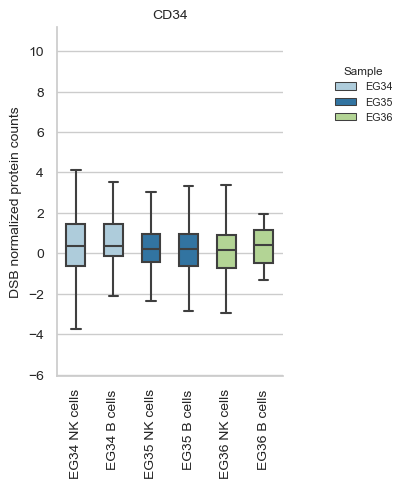

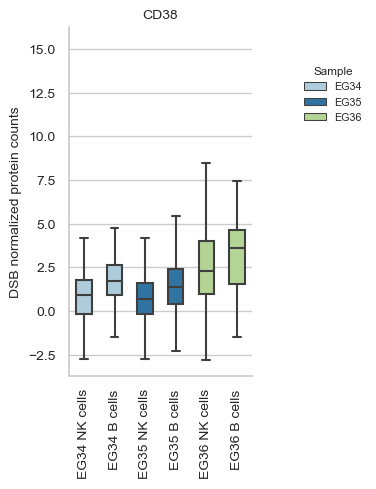

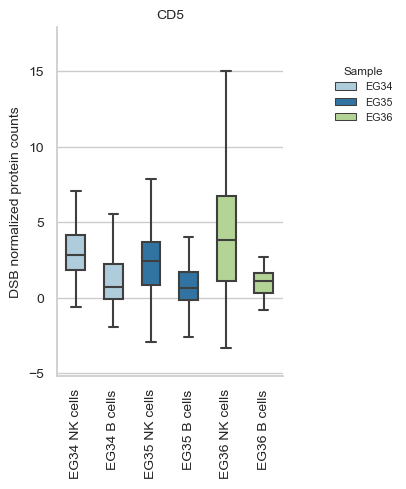

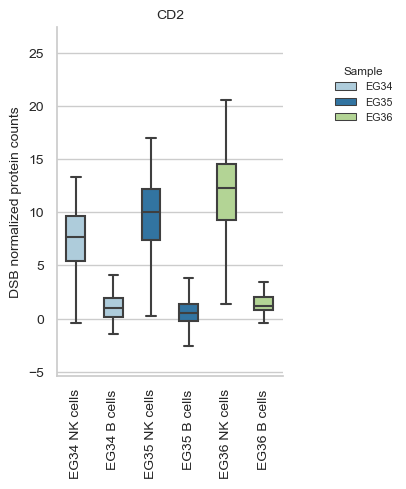

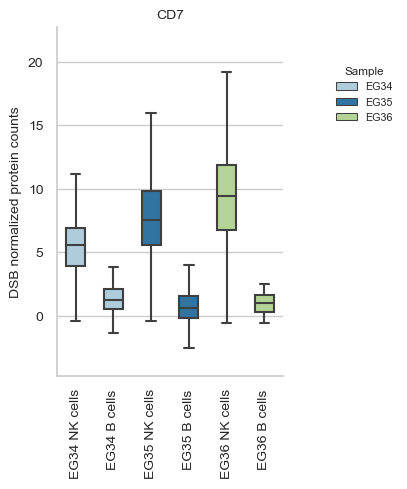

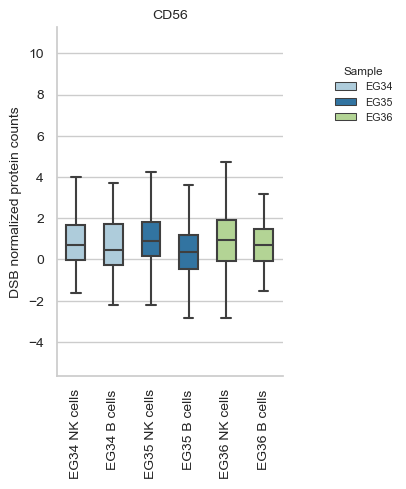

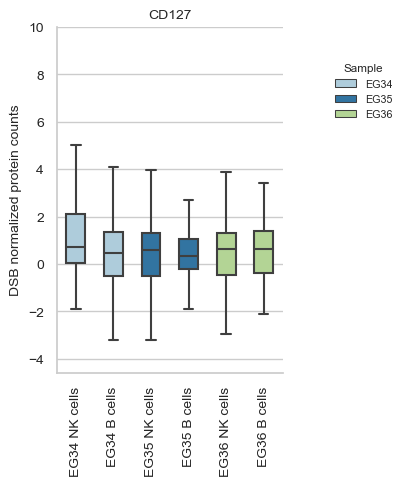

In [143]:
for prot in cdf[cdf.columns[:-2]]:
    sns.set_theme(style = "whitegrid", font_scale= 0.7)
    ax=sns.catplot(x="Sample", y=prot, hue="Samplepair",
            aspect=.3,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=cdf,
            width = 0.5)
    ax.fig.set_size_inches(7, 4)
    ax.set_xticklabels(rotation = 90)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set(xlabel=None)
    ax.set_ylabels('DSB normalized protein counts', fontsize= 10)
    sns.move_legend(ax, "upper right", bbox_to_anchor=(.85, .9), title='Sample pairs')
    plt.title(prot, fontsize=10)

    # title
    new_title = 'Sample'
    ax._legend.set_title(new_title)
    # replace labels
    new_labels = ['EG34', 'EG35', 'EG36']
    for t, l in zip(ax._legend.texts, new_labels):
        t.set_text(l)

- DSB normalized surface protein counts of NK and B cells from each sample are plotted above. 
- For CD127, CD7, CD2 and CD5 signals are clearly higher in NK cells when comparing to B cells, as expected.
- Unfortunately, CD56 signal appears to be weak. In samples EG35 and EG36 signal is slightly higher in NK cells compared to B cells, but in EG34 signals are at the same level. 
- For CD34 signal is similar (low) between cell types, while for CD38 signal is higher in B cells. CD34 is a marker for stem/progenitor cells and CD38 is known to be expressed at B cells, so results are expectable. 

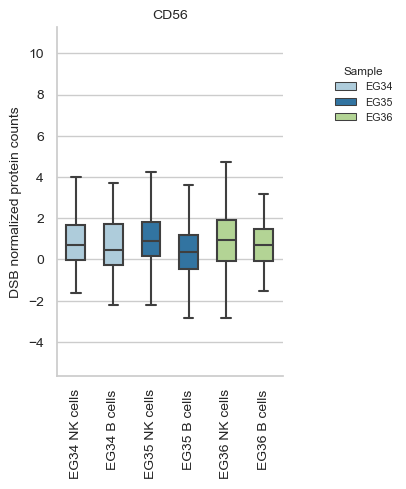

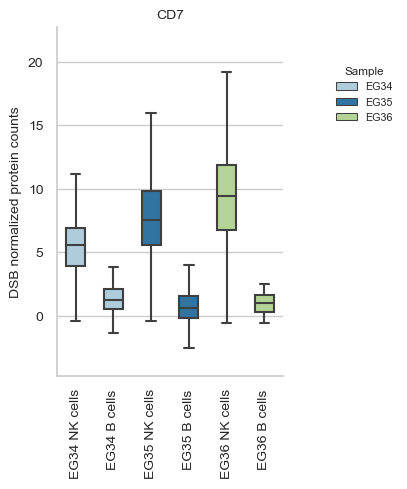

In [122]:
#CD56

sns.set_theme(style = "whitegrid", font_scale= 0.7)
ax=sns.catplot(x="Sample", y="CD56", hue="Samplepair",
            aspect=.3,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=cdf,
            legend = "CD56", width = 0.5)
ax.fig.set_size_inches(7, 4)
ax.set_xticklabels(rotation = 90)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set(xlabel=None)
ax.set_ylabels('DSB normalized protein counts', fontsize= 10)
sns.move_legend(ax, "upper right", bbox_to_anchor=(.85, .9), title='Sample pairs')
plt.title("CD56", fontsize=10)

# title
new_title = 'Sample'
ax._legend.set_title(new_title)
# replace labels
new_labels = ['EG34', 'EG35', 'EG36']
for t, l in zip(ax._legend.texts, new_labels):
    t.set_text(l)

plt.show()

#CD7

sns.set_theme(style = "whitegrid", font_scale= 0.7)
ax=sns.catplot(x="Sample", y="CD7", hue="Samplepair",
            aspect=.3,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=cdf,
            legend = "CD7", width = 0.5)
ax.fig.set_size_inches(7, 4)
ax.set_xticklabels(rotation = 90)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set(xlabel=None)
ax.set_ylabels('DSB normalized protein counts', fontsize= 10)
sns.move_legend(ax, "upper right", bbox_to_anchor=(.85, .9), title='Sample pairs')
plt.title("CD7", fontsize=10)

# title
new_title = 'Sample'
ax._legend.set_title(new_title)
# replace labels
new_labels = ['EG34', 'EG35', 'EG36']
for t, l in zip(ax._legend.texts, new_labels):
    t.set_text(l)

plt.show()




## CLR

In [145]:
#saving protein expression in NK cells into a list

list_prot_nk=[]

for sample in samples:
    eg=adata[(adata.obs['leiden_0.05'] ==  "0")]
    eg1=eg[eg.obs['POOL'] == sample]
    prot=eg1.obsm['protein_expression_clr']
    prot_marker=prot[nk_neu]
    list_prot_nk.append(prot_marker)
    

In [146]:
#Adding cell type information after sample name

string= " NK cells"

samples_nk = [x + string for x in samples]

In [147]:
#Adding sample names

list_adata_nk=[]

for i in range(len(list_prot_nk)):
    sample= list_prot_nk[i]
    sample["Sample"]=samples_nk[i]
    list_adata_nk.append(sample)
    

In [148]:
#creating df

df_nk=pd.concat(list_adata_nk, axis=0)

In [149]:
#selecting B cells

adata_b=adata[adata.obs['leiden_0.05'] == '4']

In [150]:
#saving protein counts in B cells into a list

list_prot_b=[]

for sample in samples:
    eg=adata[adata.obs['leiden_0.05'] == '4']
    eg1=eg[eg.obs['POOL'] == sample]
    prot=eg1.obsm['protein_expression_clr']
    prot_marker=prot[nk_neu]
    list_prot_b.append(prot_marker)

In [151]:
#Adding cell type information to sample names

string= " B cells"

samples_b = [x + string for x in samples]

In [152]:
#Adding sample names

list_adata_b=[]

for i in range(len(list_prot_b)):
    sample= list_prot_b[i]
    sample["Sample"]=samples_b[i]
    list_adata_b.append(sample)

In [153]:
    
#creating df
    
df_b=pd.concat(list_adata_b, axis=0)

In [154]:
#NK cells

df_nk.shape

(2697, 8)

In [155]:
#B cells

df_b.shape

(401, 8)

In [156]:
df=pd.concat([df_nk, df_b], axis=0)

In [157]:
df.shape

(3098, 8)

In [158]:
samples_b

['EG34 B cells', 'EG36 B cells', 'EG35 B cells']

In [159]:
#Assigning sample pairs (one sample, B + NK cells)

data1 = df[(df['Sample'] == "EG34 NK cells") | (df['Sample'] == 'EG34 B cells')].assign(Samplepair= 1)   
data2 = df[(df['Sample'] == "EG35 NK cells") | (df['Sample'] == 'EG35 B cells')].assign(Samplepair= 2)   
data3 = df[(df['Sample'] == "EG36 NK cells") | (df['Sample'] == 'EG36 B cells')].assign(Samplepair= 3)   

In [160]:
#df from assigned sample pairs

cdf = pd.concat([data1, data2, data3])


cdf

,CD34,CD38,CD5,CD2,CD7,CD56,CD127,Sample,Samplepair
AAACCTGCAGAGCCAA-1-148,0.810656,0.444730,0.709991,1.919286,0.709991,0.574070,0.471971,EG34 NK cells,1
AAACGGGTCAAGAAGT-1-148,0.731138,0.388031,0.791515,1.312421,1.175907,0.621627,0.358358,EG34 NK cells,1
AAAGATGCATATGGTC-1-148,0.609116,0.553955,0.888263,2.016645,0.758398,0.661392,0.367468,EG34 NK cells,1
AACACGTCAAGTAGTA-1-148,0.792681,0.440078,1.099945,2.405963,0.808199,0.676738,0.584832,EG34 NK cells,1
AACTCTTGTGTCGCTG-1-148,0.699524,0.124078,1.304571,2.625687,1.062462,0.742349,0.452634,EG34 NK cells,1
...,...,...,...,...,...,...,...,...,...
TCAGCAACAAGCCCAC-1-107,0.677736,0.793792,0.623555,0.484396,0.371622,0.677736,0.395217,EG36 B cells,3
TGATTTCAGGGATACC-1-107,0.691077,0.641586,0.624529,0.658357,0.348980,0.707045,0.371388,EG36 B cells,3
TGGTTAGTCTCGAGTA-1-107,0.658997,0.567155,0.567155,0.975953,0.466017,0.439049,0.292087,EG36 B cells,3
TTAACTCTCTTACCTA-1-107,0.481193,0.460885,0.352658,0.847406,0.305859,0.576970,0.418989,EG36 B cells,3


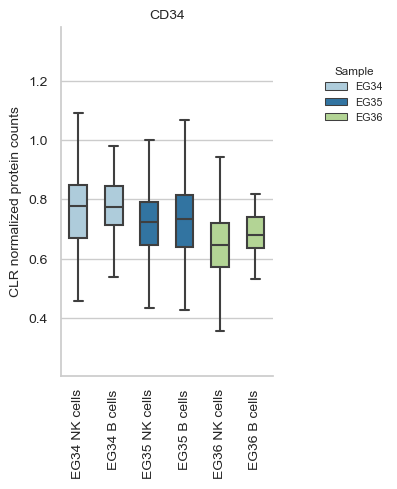

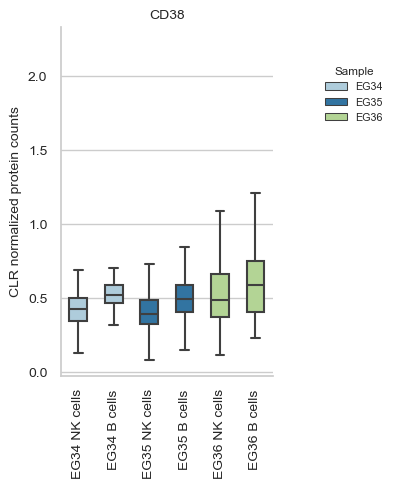

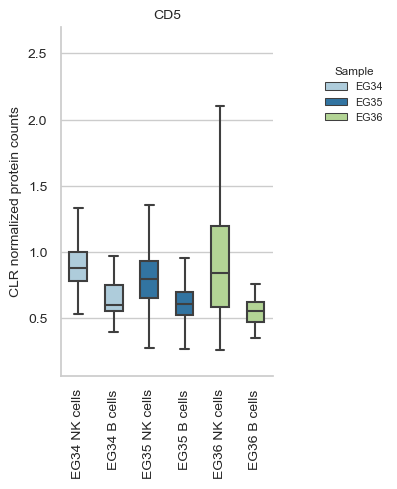

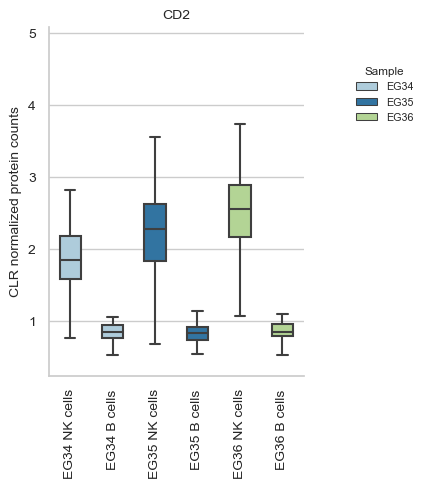

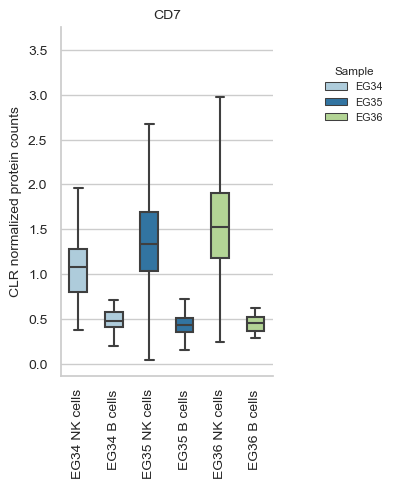

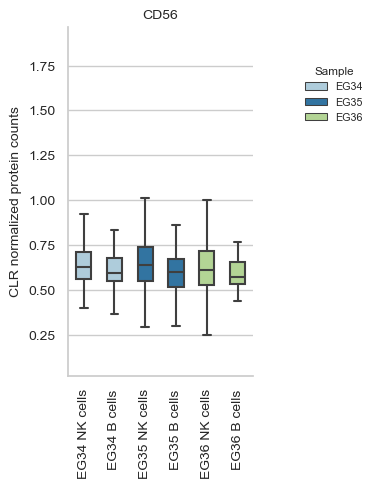

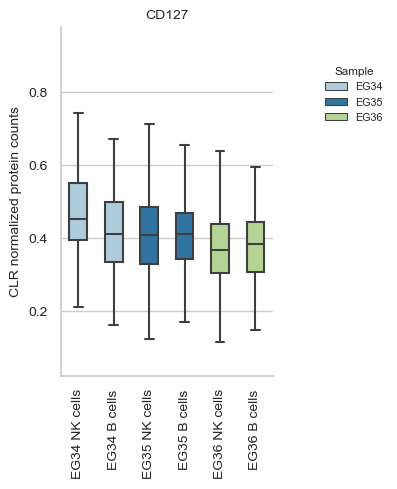

In [162]:

for prot in cdf[cdf.columns[:-2]]:
    sns.set_theme(style = "whitegrid", font_scale= 0.7)
    ax=sns.catplot(x="Sample", y=prot, hue="Samplepair",
            aspect=.3,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=cdf,
            width = 0.5)
    ax.fig.set_size_inches(7, 4)
    ax.set_xticklabels(rotation = 90)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set(xlabel=None)
    ax.set_ylabels('CLR normalized protein counts', fontsize= 10)
    sns.move_legend(ax, "upper right", bbox_to_anchor=(.85, .9), title='Sample pairs')
    plt.title(prot, fontsize=10)

    # title
    new_title = 'Sample'
    ax._legend.set_title(new_title)
    # replace labels
    new_labels = ['EG34', 'EG35', 'EG36']
    for t, l in zip(ax._legend.texts, new_labels):
        t.set_text(l)

- Results with CLR normalized protein counts are quite similar as with DSB normalized, but the signal levels are very low for many markers (close to 0).